Predictor Features:

age, sex, cp (chest pain type), trestbps (resting blood pressure), chol (cholesterol), fbs (fasting blood sugar), restecg (resting ECG results), 
thalach (max heart rate achieved), exang (exercise-induced angina), oldpeak (ST depression), slope (slope of peak exercise ST segment), 
ca (number of major vessels), thal (thalassemia type).

Target Variable:

num (0 or 1) → This indicates whether the patient has heart disease.

In [2]:
import pandas as pd 
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import  Sequential 
from tensorflow.keras.layers import Dense  , Flatten  , Dropout
from tensorflow.keras.callbacks import EarlyStopping
import sklearn
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

In [3]:
print("Pandas Version:", pd.__version__)
print("Seaborn Version:", sns.__version__)
print("NumPy Version:", np.__version__)
print("Matplotlib Version:", plt.matplotlib.__version__)
print("TensorFlow Version:", tf.__version__)
print("Scikit-learn Version:", sklearn.__version__)


Pandas Version: 2.2.3
Seaborn Version: 0.13.2
NumPy Version: 2.0.2
Matplotlib Version: 3.10.1
TensorFlow Version: 2.18.0
Scikit-learn Version: 1.6.1


In [3]:
data = pd.read_csv('heart_disease_cleaned.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In traditional heart disease datasets, thal is encoded as:

1 = Normal
2 = Fixed Defect
3 = Reversible Defect

But here, we have 3.0, 6.0, and 7.0, which are not standard.

In [6]:
# Show unique values and counts for 'thal' because we have unexpected values like 6 and 7.
print("UNIQUE VALUES IN THAL:", data['thal'].unique())

# Count occurrences of each value
print("\nValue counts:\n", data['thal'].value_counts())

# Check relation of 'thal' with 'num' (heart disease presence)
print("\nAverage heart disease presence per thal type:")
print(data.groupby('thal')['num'].mean() * 100)

# Explanation of data.groupby('thal'):
# Groups the data based on the 'thal' column (i.e., groups rows that have the same 'thal' value together).

# Explanation of mean():
# After grouping by 'thal', it calculates the mean of 'num' for each 'thal' group.
# Since 'num' is the target variable (heart disease presence), this tells us 
# the percentage of people with heart disease for each 'thal' value.


UNIQUE VALUES IN THAL: [6. 3. 7.]

Value counts:
 thal
3.0    168
7.0    117
6.0     18
Name: count, dtype: int64

Average heart disease presence per thal type:
thal
3.0    22.619048
6.0    66.666667
7.0    76.068376
Name: num, dtype: float64


Reasons for One-Hot Encoding thal
1️⃣ thal is a categorical variable (not continuous numbers).

thal = 3.0, 6.0, 7.0 represents categories (types of thalassemia).
A machine learning model treats numbers as continuous values, but these are not continuous (e.g., 6.0 is not twice as important as 3.0).
To avoid incorrect assumptions, we use One-Hot Encoding.
2️⃣ Prevents the Model from Assigning Wrong Relationships

If we keep thal as 3.0, 6.0, 7.0, the model may assume that higher values mean more risk, which might not be true.
One-Hot Encoding solves this by creating separate columns for each category.
3️⃣ No Ordinal Relationship in thal

Machine learning algorithms like Logistic Regression or Neural Networks treat numerical values as ordered (e.g., 6 > 3 means higher impact).
But thal categories are just labels, not actual numbers.
One-Hot Encoding prevents the model from assuming an order.


# step  2  ONE HOT ENCODING TO THAL FEATURE : 

In [7]:
data  =  pd.get_dummies(data,  columns=['thal'] , prefix='thal')
# but Pandas does not support converting boolean values directly to integers inside get_dummies().

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,False,True,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,True,False,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1,False,False,True
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,True,False,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,True,False,False


# Convert Booleans of Thal to Integers After Encoding

In [9]:
data = data.astype('int64')
data.iloc[: , 13 :] = data.iloc[: , 13 : ].astype('int64')

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal_3.0,thal_6.0,thal_7.0
0,63,1,1,145,233,1,2,150,0,2,3,0,0,0,1,0
1,67,1,4,160,286,0,2,108,1,1,2,3,1,1,0,0
2,67,1,4,120,229,0,2,129,1,2,2,2,1,0,0,1
3,37,1,3,130,250,0,0,187,0,3,3,0,0,1,0,0
4,41,0,2,130,204,0,2,172,0,1,1,0,0,1,0,0


# Step 3: Handle Other Categorical Features (If Any)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  num       303 non-null    int64
 13  thal_3.0  303 non-null    int64
 14  thal_6.0  303 non-null    int64
 15  thal_7.0  303 non-null    int64
dtypes: int64(16)
memory usage: 38.0 KB


In [12]:
# If there are no object-type columns, it will return an empty list.

obj_col = data.select_dtypes(include= ['object']).columns
print(obj_col)

Index([], dtype='object')


# CHECK FOR MISSING VALUES :

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
num         0
thal_3.0    0
thal_6.0    0
thal_7.0    0
dtype: int64

# Scale numerical features 

Which Scaling to Choose?

Scaling Method	When to Use?

Min-Max Scaling (0-1)	If data does not follow a normal distribution. Works best for deep learning models (ANNs).

Standardization (Z-score)	If data follows a normal distribution. Works well for SVM, logistic regression, linear regression.

Robust Scaling	If data has outliers that affect mean and standard deviation.

MaxAbs Scaling	If data is sparse (e.g., text data, TF-IDF).

#  WHY WE CHOOSE MINI MAX SCALAR ? :

After Min-Max scaling, values remain between 0 and 1, making them easier to interpret.

Example: If age = 0.8, it means the person’s age is in the upper 80% of the dataset.
    
StandardScaler transforms data into a Z-score (-3 to +3), which is harder to interpret.

Our Data Doesn't Follow a Normal Distribution  

Neural Networks Work Best with Min-Max Scaling

In [14]:
import joblib
from sklearn.preprocessing import MinMaxScaler

# Apply scaling
scaler = MinMaxScaler()
scal_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
data[scal_feat] = scaler.fit_transform(data[scal_feat])
print(data.head())

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333    1   1  0.481132  0.244292    1        2  0.603053      0   
1  0.791667    1   4  0.622642  0.365297    0        2  0.282443      1   
2  0.791667    1   4  0.245283  0.235160    0        2  0.442748      1   
3  0.166667    1   3  0.339623  0.283105    0        0  0.885496      0   
4  0.250000    0   2  0.339623  0.178082    0        2  0.770992      0   

    oldpeak  slope        ca  num  thal_3.0  thal_6.0  thal_7.0  
0  0.333333      3  0.000000    0         0         1         0  
1  0.166667      2  1.000000    1         1         0         0  
2  0.333333      2  0.666667    1         0         0         1  
3  0.500000      3  0.000000    0         1         0         0  
4  0.166667      1  0.000000    0         1         0         0  


['scaler.pkl']

#  DATA SPLITTING

In [15]:
X = data.drop(columns=['num'])
y = data['num']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print Shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (272, 15) (272,)
Testing set shape: (31, 15) (31,)


# BUILDING THE MODEL

 We'll use a Sequential model with three layers:

  Since our ANN is a simple stack of layers (input → hidden → output), Sequential is the best choice.
 
Input Layer: Number of neurons = number of features (15)

Hidden Layer: 10 neurons, activation = ReLU

Output Layer: 1 neuron, activation = Sigmoid (since it's binary classification)

General Rules for Choosing Hidden Neurons

Between input and output size:

We have 15 input features and 1 output neuron.

A common rule is to choose a hidden layer size between these two.

We selected 10 neurons as a starting point.

Empirical Testing:

If the model underfits (low accuracy), we increase neurons.

If it overfits (high training accuracy, low test accuracy), we reduce neurons.

👉 10 neurons is a good balance to start with, but we can adjust later if needed.

In [17]:
X_train.shape[1]

15

#  Define the ANN Model


In [18]:
#from tensorflow.keras.regularizers import l2

model =  Sequential([
    Dense(128, activation='relu'  , input_shape = (X_train.shape[1],) ),  #HIDEEN LAYER SPECIFYIN INPUT 
    Dense(64, activation='relu' ),
    Dense(10, activation='relu' ),
    Dense(1 , activation = 'sigmoid') # Output Layer (Sigmoid for binary classification)
])

C:\Users\syedm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 # Compile the Model

Binary Crossentropy as the loss function (since it's binary classification)
                                          
Adam optimizer for training
                                          
Accuracy as the evaluation metric

In [19]:


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#  Train the Model

In [20]:
#By checking accuracy/loss on X_test, y_test, we can detect overfitting early.
## Define the callback function
early_stopping = EarlyStopping(patience= 15)
history = model.fit(X_train , y_train , epochs = 60, batch_size = 10 , validation_data= (X_test , y_test) , callbacks=[early_stopping])

Epoch 1/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5716 - loss: 0.7090 - val_accuracy: 0.9032 - val_loss: 0.5578
Epoch 2/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7351 - loss: 0.5698 - val_accuracy: 0.9032 - val_loss: 0.4119
Epoch 3/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7755 - loss: 0.5015 - val_accuracy: 0.9355 - val_loss: 0.3136
Epoch 4/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8245 - loss: 0.4167 - val_accuracy: 0.9032 - val_loss: 0.2902
Epoch 5/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7995 - loss: 0.4294 - val_accuracy: 0.9032 - val_loss: 0.2760
Epoch 6/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8355 - loss: 0.3945 - val_accuracy: 0.8710 - val_loss: 0.2513
Epoch 7/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8244 - loss: 0.4066 - val_accuracy: 0.8710 - val_loss: 0.2568
Epoch 8/60
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8505 - loss: 0.3580 - val_accuracy: 0.8710 - v

# 1. Evaluate the Model Performance on Test Data


In [21]:
test_loss , test_accuracy = model.evaluate(X_test ,  y_test)
print(f'Testing acuuracy : {test_accuracy*100:}')
print(f'Testing Loss : {test_loss*100:}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8710 - loss: 0.3228
Testing acuuracy : 87.09677457809448
Testing Loss : 32.281723618507385


In [22]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc *100 :}")
print(f"Final Validation Accuracy: {val_acc *100:}")


Final Training Accuracy: 88.23529481887817
Final Validation Accuracy: 87.09677457809448


#  Generate Predictions on Test Data

In [23]:
# Make predictions
y_pred = model.predict(X_test)

#Since my model is using sigmoid activation in the output layer, it returns probabilities between 0 and 1.
#Typically, i classify values ≥ 0.5 as 1 (Positive) and < 0.5 as 0 ( # If ≥ 0.5, classify as 1; else, classify as 0 )

y_pred_classes = (y_pred > 0.5).astype(int)

# Print first 10 predictions vs actual labels
for i in range(20):  
    print(f"Predicted: {y_pred_classes[i][0]}, Actual: {y_test.iloc[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Predicted: 1, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 1, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0


# Evaluate Performance using Classification Metrics

In [24]:
print(classification_report(y_test , y_pred_classes)) #actual labels (y_test)  and predicted labels are  y_pred_clases

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.89      0.89      0.89        18

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



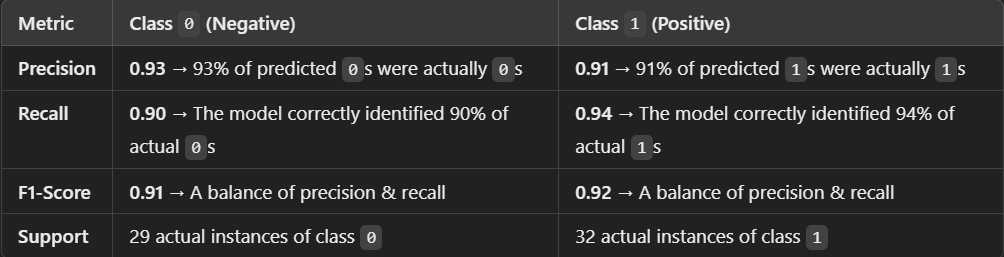

# Step 3: Analyze Accuracy & Loss Trends


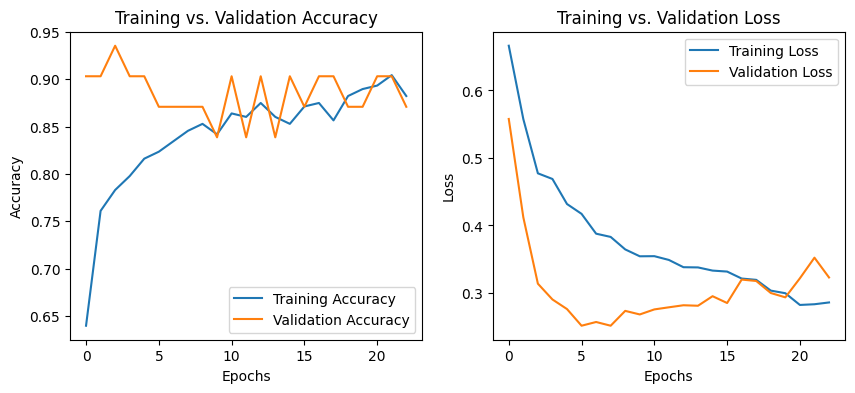

In [25]:

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()


In [26]:
# Save the trained model
model.save("heart_disease_model.h5")


In [27]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("heart_disease_model.h5")


In [29]:
import numpy as np
import tensorflow as tf
import joblib  # To load the scaler

def load_model(model_path):
    """Load the trained ANN model."""
    return tf.keras.models.load_model(model_path)

def load_scaler(scaler_path):
    """Load the MinMaxScaler used during training."""
    return joblib.load(scaler_path)

def get_user_input(scaler):
    """Collects 15 features from the user with clear explanations."""

    print("\n--- Welcome to the Heart Disease Prediction Tool ---\n")
    print("You'll be asked a few health-related questions. Please enter values carefully.\n")

    # Age
    age = int(input("Enter your age (in years): "))

    # Sex
    print("\n🔹 **Sex**: Biological sex affects heart disease risk.")
    print("   0 = Female  (Higher risk after menopause)")
    print("   1 = Male    (Higher risk at younger ages)")
    sex = int(input("Enter 0 for Female or 1 for Male: "))

    # Chest Pain Type (cp)
    print("\n🔹 **Chest Pain Type (CP)**")
    print("   0 = No Chest Pain")
    print("   1 = Mild discomfort (e.g., during exercise)")
    print("   2 = More intense pain (comes and goes)")
    print("   3 = Severe, consistent pain (highest risk)")
    cp = int(input("Enter the number that best describes your chest pain: "))

    # Resting Blood Pressure (trestbps)
    trestbps = int(input("\nEnter your resting blood pressure (in mmHg): "))

    # Cholesterol
    chol = int(input("\nEnter your total cholesterol level (mg/dL): "))

    # Fasting Blood Sugar (fbs)
    print("\n🔹 **Fasting Blood Sugar (FBS)**: Measures sugar levels after 8 hours of fasting.")
    print("   0 = Less than 126 mg/dL (Normal)")
    print("   1 = 126 mg/dL or higher (Possible diabetes)")
    fbs = int(input("Enter 0 for normal or 1 for high fasting blood sugar: "))

    # Resting ECG (restecg)
    print("\n🔹 **Resting Electrocardiogram (ECG) Results**")
    print("   0 = Normal ECG")
    print("   1 = Mild abnormalities (ST-T wave changes)")
    print("   2 = Possible left ventricular hypertrophy (thicker heart walls)")
    restecg = int(input("Enter 0, 1, or 2 based on your ECG results: "))

    # Maximum Heart Rate (thalach)
    thalach = int(input("\nEnter your maximum recorded heart rate: "))

    # Exercise-Induced Angina (exang)
    print("\n🔹 **Exercise-Induced Angina**")
    print("   0 = No pain during exercise")
    print("   1 = Chest pain or discomfort when exercising")
    exang = int(input("Enter 0 if no pain, or 1 if you experience chest pain during exercise: "))

    # Oldpeak (ST Depression)
    print("\n🔹 **ST Depression (Oldpeak)**: Measures heart stress level.")
    print("   - Enter 0 if normal")
    print("   - Higher values (e.g., 1-3) indicate possible heart disease.")
    oldpeak = float(input("Enter ST depression level (e.g., 0, 1.5, 2.3): "))

    # Slope of the Peak Exercise ST Segment
    print("\n🔹 **Slope of the ST Segment**")
    print("   0 = Upsloping (Normal)")
    print("   1 = Flat (Might indicate heart disease)")
    print("   2 = Downsloping (Higher risk of heart disease)")
    slope = int(input("Enter 0, 1, or 2 for ST segment slope: "))

    # Number of Major Vessels (ca)
    print("\n🔹 **Number of Major Blood Vessels Visible in Angiography**")
    print("   0 = No blockages visible")
    print("   1-3 = Increasing number of blocked vessels (Higher risk)")
    ca = int(input("Enter the number of major vessels detected (0-3): "))

    # Thalassemia (thal)
    print("\n🔹 **Thalassemia (Thal)**: A blood disorder affecting oxygen transport.")
    print("   3 = Normal (No problem)")
    print("   6 = Fixed Defect (Previous heart attack or damage)")
    print("   7 = Reversible Defect (Possible heart disease, but not permanent)")
    thal = int(input("Enter 3 for Normal, 6 for Fixed Defect, or 7 for Reversible Defect: "))

    # One-hot encoding for thal
    thal_encoded = [1 if thal == 3 else 0, 1 if thal == 6 else 0, 1 if thal == 7 else 0]

     # Combine numeric features
    numeric_features = np.array([[age, trestbps, chol, thalach, oldpeak, ca]])

    # Scale the numeric features
    numeric_features_scaled = scaler.transform(numeric_features)

     # Construct final input array
    final_input = np.concatenate([numeric_features_scaled[0], [sex, cp, fbs, restecg, exang, slope], thal_encoded])

    return final_input.reshape(1, -1)


def predict_heart_disease(model_path, scaler_path):
    """Loads the model, collects user input, and makes a prediction."""
    model = load_model(model_path)
    scaler = load_scaler(scaler_path)
    
    print("\n--- Heart Disease Prediction ---")
    input_data = get_user_input(scaler)
    
    print(f"\nFinal Input Shape: {input_data.shape}")  # Debugging print

    # Make prediction
    prediction = model.predict(input_data)

    # Convert prediction to class label
    if prediction[0][0] > 0.5:
        print("\n⚠️ **High risk of heart disease!** Consult a doctor as soon as possible.")
    else:
        print("\n✅ **Low risk of heart disease.** Maintain a healthy lifestyle!")

if __name__ == "__main__":
    model_path = "heart_disease_model.h5"  # Ensure this is the correct path
    scaler_path = "scaler.pkl"  # Ensure the scaler was saved properly
    predict_heart_disease(model_path , scaler_path)



--- Heart Disease Prediction ---

--- Welcome to the Heart Disease Prediction Tool ---

You'll be asked a few health-related questions. Please enter values carefully.



Enter your age (in years):  12



🔹 **Sex**: Biological sex affects heart disease risk.
   0 = Female  (Higher risk after menopause)
   1 = Male    (Higher risk at younger ages)


Enter 0 for Female or 1 for Male:  0



🔹 **Chest Pain Type (CP)**
   0 = No Chest Pain
   1 = Mild discomfort (e.g., during exercise)
   2 = More intense pain (comes and goes)
   3 = Severe, consistent pain (highest risk)


Enter the number that best describes your chest pain:  0

Enter your resting blood pressure (in mmHg):  110

Enter your total cholesterol level (mg/dL):  120



🔹 **Fasting Blood Sugar (FBS)**: Measures sugar levels after 8 hours of fasting.
   0 = Less than 126 mg/dL (Normal)
   1 = 126 mg/dL or higher (Possible diabetes)


Enter 0 for normal or 1 for high fasting blood sugar:  0



🔹 **Resting Electrocardiogram (ECG) Results**
   0 = Normal ECG
   1 = Mild abnormalities (ST-T wave changes)
   2 = Possible left ventricular hypertrophy (thicker heart walls)


Enter 0, 1, or 2 based on your ECG results:  0

Enter your maximum recorded heart rate:  100



🔹 **Exercise-Induced Angina**
   0 = No pain during exercise
   1 = Chest pain or discomfort when exercising


Enter 0 if no pain, or 1 if you experience chest pain during exercise:  0



🔹 **ST Depression (Oldpeak)**: Measures heart stress level.
   - Enter 0 if normal
   - Higher values (e.g., 1-3) indicate possible heart disease.


Enter ST depression level (e.g., 0, 1.5, 2.3):  0



🔹 **Slope of the ST Segment**
   0 = Upsloping (Normal)
   1 = Flat (Might indicate heart disease)
   2 = Downsloping (Higher risk of heart disease)


Enter 0, 1, or 2 for ST segment slope:  0



🔹 **Number of Major Blood Vessels Visible in Angiography**
   0 = No blockages visible
   1-3 = Increasing number of blocked vessels (Higher risk)


Enter the number of major vessels detected (0-3):  1



🔹 **Thalassemia (Thal)**: A blood disorder affecting oxygen transport.
   3 = Normal (No problem)
   6 = Fixed Defect (Previous heart attack or damage)
   7 = Reversible Defect (Possible heart disease, but not permanent)


Enter 3 for Normal, 6 for Fixed Defect, or 7 for Reversible Defect:  3



Final Input Shape: (1, 15)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

C:\Users\syedm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step

✅ **Low risk of heart disease.** Maintain a healthy lifestyle!


In [30]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model,file)

# JUST FOR CHECKIGN THE PROBABILITIES 

In [125]:
# Make prediction
prediction = model.predict(X_test)

# Print the raw probability score
print(f"\n🔢 **Predicted Probability:** {prediction[11][0]:.4f}")

# Convert prediction to class label
if prediction[11][0] > 0.5:
    print("\n⚠️ **High risk of heart disease!** Consult a doctor as soon as possible.")
else:
    print("\n✅ **Low risk of heart disease.** Maintain a healthy lifestyle!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

🔢 **Predicted Probability:** 0.1077

✅ **Low risk of heart disease.** Maintain a healthy lifestyle!


import numpy as np
import tensorflow as tf
import joblib  # To load the scaler

def load_model(model_path):
    """Load the trained ANN model."""
    return tf.keras.models.load_model(model_path)

def load_scaler(scaler_path):
    """Load the MinMaxScaler used during training."""
    return joblib.load(scaler_path)

def get_user_input(scaler):
    """Collects user input and scales the relevant features."""
    print("\n--- Welcome to the Heart Disease Prediction Tool ---\n")
    print("You'll be asked a few health-related questions. Please enter values carefully.\n")

    # Collecting raw input
    age = int(input("Enter your age (in years): "))
    sex = int(input("Enter 0 for Female or 1 for Male: "))
    cp = int(input("Enter your chest pain type (0-3): "))
    trestbps = int(input("Enter your resting blood pressure (in mmHg): "))
    chol = int(input("Enter your total cholesterol level (mg/dL): "))
    fbs = int(input("Enter 0 for normal fasting blood sugar or 1 for high: "))
    restecg = int(input("Enter resting ECG result (0-2): "))
    thalach = int(input("Enter your maximum recorded heart rate: "))
    exang = int(input("Enter 0 if no exercise-induced angina, 1 if present: "))
    oldpeak = float(input("Enter ST depression level (e.g., 0, 1.5, 2.3): "))
    slope = int(input("Enter ST segment slope (0, 1, or 2): "))
    ca = int(input("Enter number of major vessels (0-3): "))
    thal = int(input("Enter Thalassemia type (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect): "))

    # One-hot encoding for 'thal'
    thal_encoded = [1 if thal == 3 else 0, 1 if thal == 6 else 0, 1 if thal == 7 else 0]

    # Combine raw numeric features
    user_data = np.array([[age, trestbps, chol, thalach, oldpeak, ca]])

    # Scale the numeric features using the same MinMaxScaler
    user_data_scaled = scaler.transform(user_data)

    # Convert to final feature array (keeping categorical features unchanged)
    final_input = np.concatenate([user_data_scaled[0], [sex, cp, fbs, restecg, exang, slope], thal_encoded])

    return final_input.reshape(1, -1)

def predict_heart_disease(model_path, scaler_path):
    """Loads the model and scaler, collects user input, scales it, and makes a prediction."""
    model = load_model(model_path)
    scaler = load_scaler(scaler_path)
    
    print("\n--- Heart Disease Prediction ---")
    input_data = get_user_input(scaler)
    
    print(f"\nFinal Input Shape: {input_data.shape}")  # Debugging print

    # Make prediction
    prediction = model.predict(input_data)

    # Convert prediction to class label
    if prediction[0][0] > 0.5:
        print("\n⚠️ **High risk of heart disease!** Consult a doctor as soon as possible.")
    else:
        print("\n✅ **Low risk of heart disease.** Maintain a healthy lifestyle!")

if __name__ == "__main__":
    model_path = "heart_disease_model.h5"  # Ensure this is the correct path
    scaler_path = "scaler.pkl"  # Save this during training
    predict_heart_disease(model_path, scaler_path)
